In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas as pd
import re
from datetime import datetime

from Convert_to_Profiles_Functions import *
from Get_Events_Functions import *
from Steef_Functions import *

quintile_mapping = {1: 'F2', 2: 'F1', 3: 'C', 4: 'B1', 5: 'B2'}

def create_dimensionless_event(cumulative_rainfall):

    # Step 3: Normalize the cumulative rainfall by the total event depth
    total_event_depth = cumulative_rainfall[-1]
    normalized_cumulative_rainfall = np.array(cumulative_rainfall) / total_event_depth

    # Step 4: Calculate the cumulative event duration
    # Since each time step is 30 minutes, we multiply the index by 0.5 (for hours)
    time_step = 0.5  # 30 minutes = 0.5 hours
    cumulative_duration = np.arange(1, len(cumulative_rainfall) + 1) * time_step
    
    # Step 5: Normalize the cumulative duration by the total event duration
    total_event_duration = cumulative_duration[-1]
    normalized_cumulative_duration = cumulative_duration / total_event_duration
    
    normalized_cumulative_rainfall = np.insert(normalized_cumulative_rainfall, 0, 0)  # Adding 0 at the start
    normalized_cumulative_duration = np.insert(normalized_cumulative_duration, 0, 0)  
    
    return normalized_cumulative_rainfall, normalized_cumulative_duration

def redistribute(array_in,len_out):
    len_in=len(array_in)
    # Array going from 0 up to and including the number of original points
    in_bounds=np.arange(len_in+1)
    # Calculates the total accumulated value at each original point
    # Adds a zero for point zero
    csum=np.cumsum(np.hstack((np.array([0.]),array_in)))
    # Array of the "time points" corresponding to
    # Boundaries of output intervals
    out_bounds=np.arange(len_out+1)*(len_in/(1.0*len_out))
    # Interpolate total accumulated value to desired output points
    csum_out=np.interp(out_bounds,in_bounds,csum)
    # Interpolate back to accumulations over the desired number of intervals
    array_out=csum_out[1:]-csum_out[:-1]
    return array_out

### Get a rainfall event

In [2]:
gauge_num =1 
fp = '/nfs/a161/gy17m2a/PhD/ProcessedData/IndependentEvents/NIMROD_30mins/NIMROD_2.2km_filtered_100/1/WholeYear/0.5hrs_2006_v2_part0.csv'
this_event = read_event(gauge_num, fp)
trimmed_event = remove_leading_and_trailing_zeroes(this_event)
real_trimmed_event, problem_events = remove_events_with_problems(trimmed_event, verbose=False)
len(real_trimmed_event)

3

In [3]:
gauge_num =1 
fp = '/nfs/a161/gy17m2a/PhD/ProcessedData/IndependentEvents/NIMROD_30mins/NIMROD_2.2km_filtered_100/1292/WholeYear/6hrs_2020_v2_part0.csv'
this_event = read_event(gauge_num, fp)
trimmed_event = remove_leading_and_trailing_zeroes(this_event)
real_trimmed_event, problem_events = remove_events_with_problems(trimmed_event, verbose=False)
len(real_trimmed_event)

31

## Get a dimensionless version of event and plot

In [4]:
precip = real_trimmed_event['precipitation (mm)']

In [10]:
dimensionless_cumulative_rainfall, dimensionless_cumulative_times = create_huff_curves(precip)
interpolated_cumulative_rainfall, interpolated_times = interpolate_rainfall(dimensionless_cumulative_rainfall,12)
irain_14vals, irain_times_14vals= create_irain_profile(interpolated_cumulative_rainfall, True)
irain, irain_times= create_irain_profile(interpolated_cumulative_rainfall, False)
max_quintile = find_max_quintile(precip)

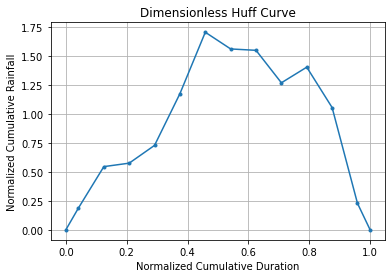

In [13]:
# Step 6: Plot the dimensionless Huff curve
plt.plot(irain_times_14vals, irain_14vals, marker='.')
plt.xlabel('Normalized Cumulative Duration')
plt.ylabel('Normalized Cumulative Rainfall')
plt.title('Dimensionless Huff Curve')
plt.grid(True)
plt.show()

### See how long the event is

### Steef method

In [25]:
# this function is edited to add on the preceding and trailing 0/1
category, event_curve_14 = analyse_event(precip)

In [28]:
# plot_normalised_intensity(event_curve_14, category)

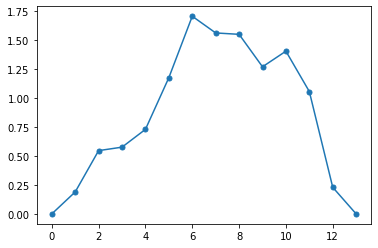

In [27]:
plt.plot(event_curve_14, marker = '.', markersize=10)

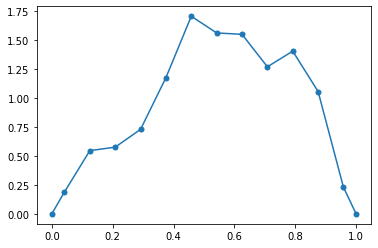

In [19]:
plt.plot(irain_times_14vals, irain_14vals, marker = '.', markersize=10)